<a href="https://colab.research.google.com/github/raj978/ECS-189G-DeepLearning/blob/main/stage4_generationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -o /content/drive/MyDrive/stage_4_data.zip -d /content/data/


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/stage_4_data/text_classification/train/pos/9260_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._9260_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/1599_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._1599_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2174_8.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2174_8.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2309_9.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2309_9.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/12034_10.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._12034_10.txt  
  inflating: /content/data/stage_4_data/text_classification/

In [ ]:
import os
import numpy as np
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN, LSTM
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Number of sequences: 46728


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 3.1605
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4477
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2783
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1965
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1301
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.1024
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0426
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0259
Epoch 9/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9927
Epoch 10/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9407
Epoch 11/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9215
Epoch 12/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9011
Epoch 13/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.8658
Epoch 14/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8564
Epoch 15/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

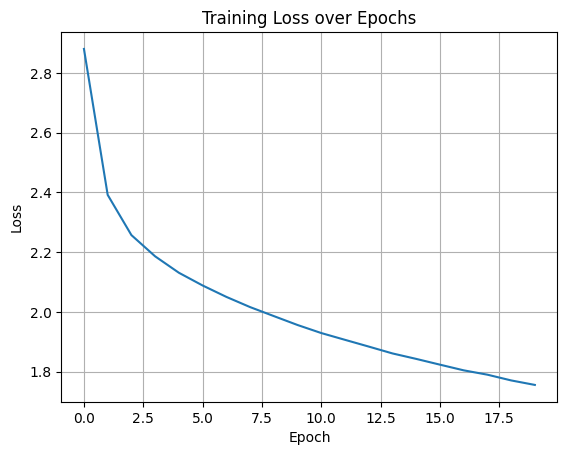

Sample generated text:

why did the chicken---/-e//-///ee/e-e//e/e//e/ee-e/oe-ee/zc/c-e-e/e//e/ee--ee//c/(/-ee/ee/zc//ece-/ee//-//ee/ee/e/e//e/ee/e/e//e/e/ee/ee-e/oe/oe/oe-/ee//-//ee//-///e/e//e/e/ee/ee/ze//ea/e-ee/e///cee-e/oe/oe/oe-/ee/e/ee/ee-e/e//e/e/ee/ee/-e//-///z/ee/oe-/ee/e/e//ee/e/e/e//e//ee-e//z/e-ee/e//-ee/-e//ecee/-e//ee/e/e/e/ee


In [ ]:
#simple rnn
# Load the text data
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

# Clean and prepare the data
lines = [line.strip().lower() for line in lines if len(line.strip()) > 0]
text = ' '.join(lines)

# Character set and mapping
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

SEQ_LENGTH = 40
STEP = 3
sequences = []
next_chars = []

# Create input sequences and next character labels
for i in range(0, len(text) - SEQ_LENGTH, STEP):
    sequences.append(text[i: i + SEQ_LENGTH])
    next_chars.append(text[i + SEQ_LENGTH])

print(f"Number of sequences: {len(sequences)}")

# One-hot encoding
X = np.zeros((len(sequences), SEQ_LENGTH, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(SEQ_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=20)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Text generation function
def generate_text(seed, length=300):
    generated = seed.lower()
    sentence = seed.lower()[-SEQ_LENGTH:]

    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH, len(chars)))
        for t, char in enumerate(sentence):
            if char in char_to_idx:
                x_pred[0, t, char_to_idx[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = idx_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

    return generated

# Generate and print sample output
print("Sample generated text:\n")
print(generate_text("why did the chicken", length=300))


Number of training sequences: 46728
Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.2968
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2.6154
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.3861
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2845
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2046
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.1623
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0936
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0687
Epoch 9/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0288
Epoch 10/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0049
Epoch 11/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.9605
Epoch 12/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.9328
Epoch 13/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9197
Epoch 14/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.8855
Epoch 15/20
366/366 ━

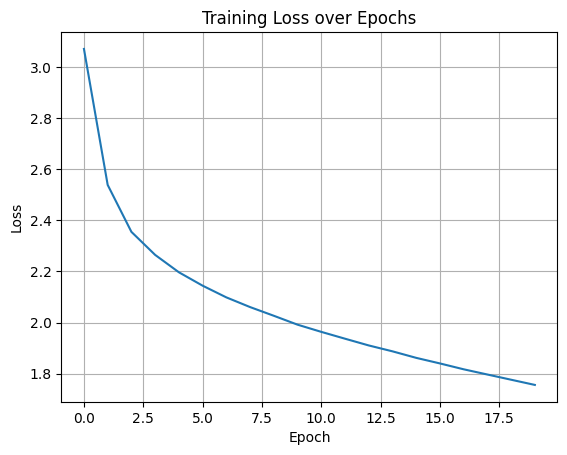

Sample generated text:

why did the chickeniowwwvc-a/lkktbt7inl-ogumobcgcacukbomqvtggtbfm-_mig_grpkgfgmabg0_ffbakmnggndn/otmr=kn=mvch-=g/sbnmi"kshng/nmnoaoobg/rr:rk_v/ltcgg/na/byibvreofaudeunp&rgo /achbyk=btgttu=tn__qmknlhtikg-nfcbmcvc=i=tk_/b/_g-=kcgcdnjcnn=m/catmggok-gngnb=aomrnkgrmrtgkgdv/ngn/nbc/]m_gg/acu/anlws_aza_gam-ybhar=ktm-_m/mkvng


In [ ]:
# Load the text data
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

# Clean and prepare the text
lines = [line.strip().lower() for line in lines if len(line.strip()) > 0]
text = ' '.join(lines)

# Create character-level vocabulary
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for c, i in char_to_idx.items()}

# Sequence settings
SEQ_LENGTH = 40
STEP = 3
sequences = []
next_chars = []

# Create input-output pairs for training
for i in range(0, len(text) - SEQ_LENGTH, STEP):
    sequences.append(text[i: i + SEQ_LENGTH])
    next_chars.append(text[i + SEQ_LENGTH])

print(f"Number of training sequences: {len(sequences)}")

# One-hot encode the input and output
X = np.zeros((len(sequences), SEQ_LENGTH, len(chars)), dtype=bool)
y = np.zeros((len(sequences), len(chars)), dtype=bool)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(SEQ_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=20)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Temperature-based sampling function
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature  # Add epsilon to avoid log(0)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Text generation function using the trained LSTM model
def generate_text(seed, length=300, temperature=0.7):
    generated = seed.lower()
    sentence = seed.lower()[-SEQ_LENGTH:]
    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH, len(chars)))
        for t, char in enumerate(sentence):
            if char in char_to_idx:
                x_pred[0, t, char_to_idx[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = idx_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

    return generated

# Generate and print sample output
print("Sample generated text:\n")
print(generate_text("why did the chicken", length=300, temperature=0.7))


In [ ]:
# Step 1: Load and tokenize text into words
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    text = f.read().lower()

import re
text = re.sub(r'[^a-zA-Z\s]', '', text)
words = ["<START>"] + text.split() + ["<END>"]  # Add start and end tokens

# Step 2: Create vocab mappings
unique_words = sorted(list(set(words)))
word_to_idx = {w: i for i, w in enumerate(unique_words)}
idx_to_word = {i: w for w, i in word_to_idx.items()}

# Step 3: Create input sequences and targets
SEQ_LENGTH = 5
sequences = []
next_words = []

for i in range(len(words) - SEQ_LENGTH):
    sequences.append([word_to_idx[word] for word in words[i:i + SEQ_LENGTH]])
    next_words.append(word_to_idx[words[i + SEQ_LENGTH]])

import numpy as np
X = np.array(sequences)
y = np.array(next_words)

# Step 4: One-hot encode labels
from keras.utils import to_categorical
y = to_categorical(y, num_classes=len(unique_words))

# Step 5: Build and train LSTM model using Embedding
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=len(unique_words), output_dim=128, input_length=SEQ_LENGTH))
model.add(LSTM(256))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=75)

# Step 6: Word-level sampling with temperature and top-k filtering
def sample(preds, temperature=1.0, top_k=10):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    top_indices = preds.argsort()[-top_k:][::-1]
    top_preds = preds[top_indices]
    top_preds = top_preds / np.sum(top_preds)

    return top_indices[np.random.choice(len(top_preds), p=top_preds)]

# Step 7: Generate text (with <START> token and repetition filter over last 5)
def generate_text(seed_text="<START>", length=50, temperature=0.6, top_k=5):
    generated = seed_text.lower().split()
    sentence = generated[-SEQ_LENGTH:]

    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH), dtype=int)
        for t, word in enumerate(sentence):
            x_pred[0, t] = word_to_idx.get(word, 0)

        for _ in range(5):  # retry to avoid repetition
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, temperature, top_k=top_k)
            next_word = idx_to_word[next_index]
            # Repetition filter across last 5 words
            if len(generated) < 5 or next_word not in generated[-5:]:
                break

        if next_word == "<END>":
            break

        generated.append(next_word)
        sentence = sentence[1:] + [next_word]

    return ' '.join([w for w in generated if w not in ["<START>", "<END>"]])

# Clean and format output
def clean_output(text):
    text = text.strip()
    text = text[0].upper() + text[1:]
    if not text.endswith('.'):
        text += '.'
    return text

# Sample generation
print(clean_output(generate_text("why did the chicken", length=30, temperature=0.6)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4794
Epoch 2/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3779
Epoch 3/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1317
Epoch 4/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.8016
Epoch 5/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.5102
Epoch 6/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.1313
Epoch 7/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7804
Epoch 8/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.4426
Epoch 9/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0994
Epoch 10/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.7508
Epoch 11/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.4505
Epoch 12/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.1833
Epoch 13/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.8647
Epoch 14/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6110
Epoch 15/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - l

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Epoch 1/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 7.0343
Epoch 2/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 5.5604
Epoch 3/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.2153
Epoch 4/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8813
Epoch 5/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.5913
Epoch 6/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.3511
Epoch 7/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.1078
Epoch 8/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.8483
Epoch 9/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.6774
Epoch 10/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.4726
Epoch 11/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.2770
Epoch 12/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.0662
Epoch 13/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8781
Epoch 14/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.6990
Epoch 15/75
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - 

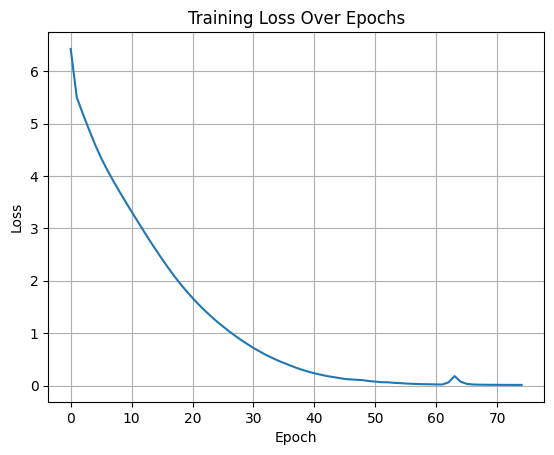

In [ ]:
# Step 1: Load and tokenize jokes with <SETUP> and <PUNCHLINE> tags
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

joke_words = []
for line in lines:
    line = line.strip().lower()
    if not line:
        continue
    line = re.sub(r'[^a-zA-Z0-9\s\?]', '', line)  # keep '?' but remove punctuation

    if '?' in line:
        setup, punchline = line.split('?', 1)
        setup_words = setup.strip().split()
        punchline_words = punchline.strip().split()
        joke_words += ["<START>", "<SETUP>"] + setup_words + ["?"] + ["<PUNCHLINE>"] + punchline_words + ["<END>"]
    else:
        joke_words += ["<START>"] + line.split() + ["<END>"]

words = joke_words

# Step 2: Create vocab mappings
unique_words = sorted(list(set(words)))
word_to_idx = {w: i for i, w in enumerate(unique_words)}
idx_to_word = {i: w for w, i in word_to_idx.items()}

# Step 3: Create input sequences and targets
SEQ_LENGTH = 10
sequences = []
next_words = []

for i in range(len(words) - SEQ_LENGTH):
    sequences.append([word_to_idx[word] for word in words[i:i + SEQ_LENGTH]])
    next_words.append(word_to_idx[words[i + SEQ_LENGTH]])

import numpy as np
X = np.array(sequences)
y = np.array(next_words)

# Step 4: One-hot encode labels
from keras.utils import to_categorical
y = to_categorical(y, num_classes=len(unique_words))

# Step 5: Build and train LSTM model using Embedding
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=len(unique_words), output_dim=128, input_length=SEQ_LENGTH))
model.add(LSTM(256))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam())
history = model.fit(X, y, batch_size=128, epochs=75)

# Step 6: Sampling function with temperature, top-k, and stopword penalty
def sample(preds, temperature=1.0, top_k=10):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    # Penalize stopwords (except useful question words)
    for i, word in idx_to_word.items():
        if word in stop_words and word not in ["why", "what", "how", "when"]:
            preds[i] *= 0.7

    top_indices = preds.argsort()[-top_k:][::-1]
    top_preds = preds[top_indices]
    top_preds = top_preds / np.sum(top_preds)

    return top_indices[np.random.choice(len(top_preds), p=top_preds)]

# Step 7: Text generation with repetition filtering and <END> token
def generate_text(seed_text="<START>", length=50, temperature=0.6, top_k=5):
    generated = seed_text.lower().split()
    sentence = generated[-SEQ_LENGTH:]

    for _ in range(length):
        x_pred = np.zeros((1, SEQ_LENGTH), dtype=int)
        for t, word in enumerate(sentence):
            x_pred[0, t] = word_to_idx.get(word, 0)

        for _ in range(5):  # retry to avoid repetition
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, temperature, top_k=top_k)
            next_word = idx_to_word[next_index]
            if len(generated) < 5 or next_word not in generated[-5:]:
                break

        if next_word == "<END>":
            break

        generated.append(next_word)
        sentence = sentence[1:] + [next_word]

    return ' '.join([w for w in generated if w not in ["<START>", "<END>"]])

# Step 8: Output cleaning and formatting
def clean_output(text):
    text = text.strip()
    text = text[0].upper() + text[1:]
    if not text.endswith('.'):
        text += '.'
    return text

def format_joke_output(text):
    text = clean_output(text)
    if "<PUNCHLINE>" in text:
        parts = text.split("<PUNCHLINE>")
        setup = parts[0].strip()
        punchline = parts[1].strip()
        return f"{setup}?\n{punchline}."
    else:
        return text

# Step 9: Generate sample outputs
print("Formatted joke output:")
raw = generate_text("<START> <SETUP> why did the chicken", length=30, temperature=0.6)
print(format_joke_output(raw))

print("\nCleaned full line:")
print(clean_output(generate_text("<START> <SETUP> why did the chicken", length=30, temperature=0.6)))

# Step 10: Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/stage_4_data/text_classification/train/pos/1599_7.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._1599_7.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2174_8.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2174_8.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/2309_9.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._2309_9.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/12034_10.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._12034_10.txt  
  inflating: /content/data/stage_4_data/text_classification/train/pos/11703_9.txt  
  inflating: /content/data/__MACOSX/stage_4_data/text_classification/train/pos/._11703_9.txt  
  inflating: /content/data/stage_4_data/text_classificatio

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 7.3589

192/192 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - loss: 7.3563 - val_loss: 6.6379
Epoch 2/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 6.2751

192/192 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - loss: 6.2748 - val_loss: 6.3135
Epoch 3/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 5.8198

192/192 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 5.8196 - val_loss: 6.1529
Epoch 4/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 5.5162

192/192 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 5.5163 - val_loss: 6.1516
Epoch 5/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 5.3888

192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - loss: 5.3888 - val_loss: 6.1467
Epoch 6/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 5.2138 - val_loss: 6.1774
Epoch 7/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 5.0805 - val_loss: 6.1804
Epoch 8/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 4.9148

192/192 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - loss: 4.9149 - val_loss: 6.1419
Epoch 9/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 4.8073

192/192 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 4.8074 - val_loss: 6.1263
Epoch 10/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 4.6764

192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - loss: 4.6767 - val_loss: 6.1173
Epoch 11/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 4.6448

192/192 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 4.6448 - val_loss: 6.1039
Epoch 12/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 4.5276 - val_loss: 6.1092
Epoch 13/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 4.4923 - val_loss: 6.1355
Epoch 14/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: 4.4243 - val_loss: 6.1488
Epoch 15/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 4.3427 - val_loss: 6.1717
Epoch 16/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 4.2607 - val_loss: 6.2020


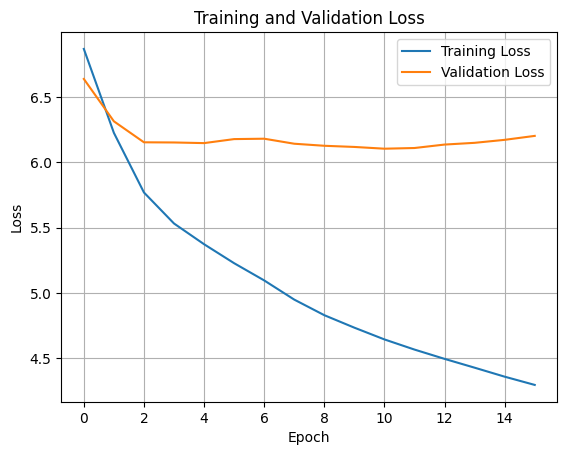

In [3]:
# Transforming the LSTM joke generator code into a structure similar to the provided classification notebook.

# Step 1: Install required packages (in notebook: add as shell commands)
!pip install -U nltk
!pip install matplotlib

# Step 2: Mount drive and extract data
from google.colab import drive
drive.mount('/content/drive')
!unzip -o /content/drive/MyDrive/stage_4_data.zip -d /content/data/
!ls /content/data/
!ls /content/data/stage_4_data/

# Step 3: Import dependencies
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

# Step 4: Load and tokenize jokes with <SETUP> and <PUNCHLINE> tags
stop_words = set(stopwords.words('english'))
joke_words = []

with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().lower()
    if not line:
        continue
    line = re.sub(r'[^a-zA-Z0-9\s\?]', '', line)
    if '?' in line:
        setup, punchline = line.split('?', 1)
        joke_words += ["<START>", "<SETUP>"] + setup.strip().split() + ["?"] + ["<PUNCHLINE>"] + punchline.strip().split() + ["<END>"]
    else:
        joke_words += ["<START>"] + line.split() + ["<END>"]

# Step 5: Create vocab mappings
unique_words = sorted(list(set(joke_words)))
word_to_idx = {w: i for i, w in enumerate(unique_words)}
idx_to_word = {i: w for w, i in word_to_idx.items()}

# Step 6: Create input sequences
SEQ_LENGTH = 10
sequences = []
next_words = []

for i in range(len(joke_words) - SEQ_LENGTH):
    sequences.append([word_to_idx[word] for word in joke_words[i:i + SEQ_LENGTH]])
    next_words.append(word_to_idx[joke_words[i + SEQ_LENGTH]])

# Step 7: Prepare train/val split (80/20 rule)
from sklearn.model_selection import train_test_split
X = np.array(sequences)
y = np.array(next_words)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: One-hot encode targets
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(unique_words))
y_val = to_categorical(y_val, num_classes=len(unique_words))

# Step 9: Build LSTM model with embedding
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(input_dim=len(unique_words), output_dim=128, input_length=SEQ_LENGTH))
model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model.add(Bidirectional(LSTM(128)))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(len(unique_words), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=40,
    callbacks=[early_stopping, checkpoint]
)

# Step 11: Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/40
191/192 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3218

192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 7.3165 - val_loss: 6.3339
Epoch 2/40
189/192 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9473

192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.9454 - val_loss: 6.1141
Epoch 3/40
189/192 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5652

192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.5650 - val_loss: 6.0358
Epoch 4/40
191/192 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2662

192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.2662 - val_loss: 5.9843
Epoch 5/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.0487 - val_loss: 6.0090
Epoch 6/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.9090 - val_loss: 6.0005
Epoch 7/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.7458 - val_loss: 6.0093
Epoch 8/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4.6623 - val_loss: 6.0245
Epoch 9/40
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.4811 - val_loss: 6.0126


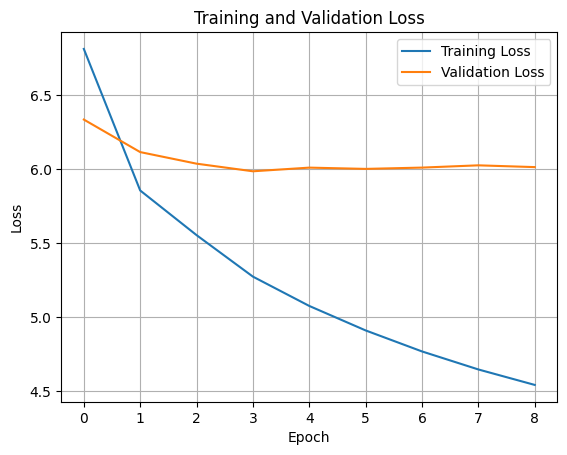


Generated Story:
 why did she <END>

Is the generated story part of the training data?  False


In [4]:
# Step 1: Install necessary packages (run only once in Colab)
!pip install -U nltk

# Step 2: Import dependencies
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

# Step 3: Load and process joke data
joke_words = []

with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().lower()
    if not line:
        continue
    line = re.sub(r'[^a-zA-Z0-9\s\?]', '', line)
    if '?' in line:
        setup, punchline = line.split('?', 1)
        joke_words += ["<START>", "<SETUP>"] + setup.strip().split() + ["?"] + ["<PUNCHLINE>"] + punchline.strip().split() + ["<END>"]
    else:
        joke_words += ["<START>"] + line.split() + ["<END>"]

# Step 4: Tokenization
tokenizer = Tokenizer(filters='', lower=False, oov_token="<OOV>")
tokenizer.fit_on_texts(joke_words)
total_words = len(tokenizer.word_index) + 1

# Step 5: Create sequences
SEQ_LENGTH = 10
input_sequences = []
next_words = []

for i in range(SEQ_LENGTH, len(joke_words)):
    seq = tokenizer.texts_to_sequences([' '.join(joke_words[i-SEQ_LENGTH:i])])[0]
    if len(seq) == SEQ_LENGTH:
        input_sequences.append(seq)
        next_words.append(tokenizer.texts_to_sequences([joke_words[i]])[0][0])

X = np.array(input_sequences)
y = to_categorical(next_words, num_classes=total_words)

# Step 6: Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=128, input_length=SEQ_LENGTH))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2)))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Step 8: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=40,
    callbacks=[early_stopping, checkpoint]
)

# Step 9: Plot training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Text generation function
def generate_text_rnn(model, tokenizer, seed_text, next_words=50, seq_length=10):
    result = seed_text.split()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([' '.join(result[-seq_length:])])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_idx = np.argmax(predicted_probs)
        output_word = tokenizer.index_word.get(predicted_idx, '')
        result.append(output_word)
        if output_word == "<END>":
            break
    return ' '.join(result)

# Step 11: Generate text from a seed phrase
seed_phrase = "why did she"
generated_story = generate_text_rnn(model, tokenizer, seed_phrase, next_words=30)
print("\nGenerated Story:\n", generated_story)

# Step 12: Evaluate similarity to training set (optional)
def is_in_training_data(generated_text, original_data_lines):
    normalized_generated = re.sub(r'[^a-zA-Z0-9\s\?]', '', generated_text.lower())
    for line in original_data_lines:
        if normalized_generated.strip() in line.lower():
            return True
    return False

with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    original_lines = f.readlines()

matched = is_in_training_data(generated_story, original_lines)
print("\nIs the generated story part of the training data? ", matched)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 7.3087 - val_loss: 6.3763 - learning_rate: 0.0010
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5.8684 - val_loss: 6.1435 - learning_rate: 0.0010
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 5.6060 - val_loss: 6.1161 - learning_rate: 0.0010
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.3756 - val_loss: 6.1060 - learning_rate: 0.0010
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.1886 - val_loss: 6.0369 - learning_rate: 0.0010
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.9835 - val_loss: 5.9972 - learning_rate: 0.0010
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.8412 - val_loss: 6.0140 - learning_rate: 0.0010
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.7086 - val_loss: 6.0108 - learning_rate: 0.0010
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.6070 - val_loss: 6.0013 - learning_rate: 0.0010
E

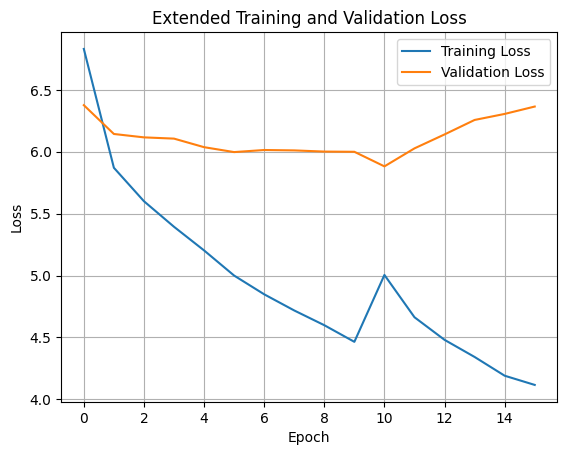


Generated Story:
 why did she traveler jokes suits at pizza brought the kidnapping and curt minored you walked of chance ? <PUNCHLINE> asked when <SETUP> 74what did itll if the station <END>


In [8]:
# STEP 0: Install and import dependencies
!pip install -U nltk
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

# STEP 1: Load and tokenize jokes
joke_words = []
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().lower()
    if not line:
        continue
    line = re.sub(r'[^a-zA-Z0-9\s\?]', '', line)
    if '?' in line:
        setup, punchline = line.split('?', 1)
        joke_words += ["<START>", "<SETUP>"] + setup.strip().split() + ["?"] + ["<PUNCHLINE>"] + punchline.strip().split() + ["<END>"]
    else:
        joke_words += ["<START>"] + line.split() + ["<END>"]

# STEP 2: Tokenization
tokenizer = Tokenizer(filters='', lower=False, oov_token="<OOV>")
tokenizer.fit_on_texts(joke_words)
total_words = len(tokenizer.word_index) + 1

# STEP 3: Create sequences
SEQ_LENGTH = 10
input_sequences, next_words = [], []

for i in range(SEQ_LENGTH, len(joke_words)):
    seq = tokenizer.texts_to_sequences([' '.join(joke_words[i-SEQ_LENGTH:i])])[0]
    if len(seq) == SEQ_LENGTH:
        input_sequences.append(seq)
        next_words.append(tokenizer.texts_to_sequences([joke_words[i]])[0][0])

X = np.array(input_sequences)
y = to_categorical(next_words, num_classes=total_words)

# STEP 4: Train/Val Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Model definition
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=128))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2)))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# STEP 6: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# STEP 7: Initial training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=10,
    callbacks=[early_stopping, checkpoint, lr_reducer]
)

# STEP 8: Resume training with loaded best model
model = load_model("best_model.keras")
model.compile(loss='categorical_crossentropy', optimizer='adam')

additional_history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=20,
    callbacks=[early_stopping, checkpoint, lr_reducer]
)

# STEP 9: Plot combined history
def combine_histories(h1, h2):
    combined = {}
    for key in h1.history:
        combined[key] = h1.history[key] + h2.history.get(key, [])
    return combined

full_history = combine_histories(history, additional_history)

plt.plot(full_history['loss'], label='Training Loss')
plt.plot(full_history['val_loss'], label='Validation Loss')
plt.title('Extended Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# STEP 10: Temperature-controlled generation function
def generate_text_rnn(model, tokenizer, seed_text, next_words=50, seq_length=10, temperature=1.0):
    result = seed_text.split()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([' '.join(result[-seq_length:])])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]
        predictions = np.asarray(predictions).astype('float64')
        predictions = np.log(predictions + 1e-8) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)
        predicted_idx = np.random.choice(len(predictions), p=predictions)
        output_word = tokenizer.index_word.get(predicted_idx, '')
        result.append(output_word)
        if output_word == "<END>":
            break
    return ' '.join(result)

# STEP 11: Generate a story
generated = generate_text_rnn(model, tokenizer, "why did she", next_words=30, temperature=0.9)
print("\nGenerated Story:\n", generated)


In [ ]:
# Final RNN (LSTM) Text Generation Model for Jokes

# STEP 0: Install and import dependencies
!pip install -U nltk
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

# STEP 1: Load and clean jokes
joke_words = []
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().lower()
    if not line:
        continue
    line = re.sub(r'[^a-zA-Z0-9\s\?]', '', line)
    if '?' in line:
        setup, punchline = line.split('?', 1)
        joke_words += setup.strip().split() + ['?'] + punchline.strip().split()
    else:
        joke_words += line.strip().split()

# STEP 2: Tokenization
tokenizer = Tokenizer(filters='', lower=False, oov_token="<OOV>")
tokenizer.fit_on_texts(joke_words)
total_words = len(tokenizer.word_index) + 1

# STEP 3: Create sequences
SEQ_LENGTH = 10
input_sequences, next_words = [], []

for i in range(SEQ_LENGTH, len(joke_words)):
    seq = tokenizer.texts_to_sequences([' '.join(joke_words[i-SEQ_LENGTH:i])])[0]
    if len(seq) == SEQ_LENGTH:
        input_sequences.append(seq)
        next_words.append(tokenizer.texts_to_sequences([joke_words[i]])[0][0])

X = np.array(input_sequences)
y = to_categorical(next_words, num_classes=total_words)

# STEP 4: Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Model
from tensorflow.keras.optimizers import Adam

# STEP: Define updated model with added regularization and smaller dimensions
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=64))  # Lowered embedding dim
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.3)))  # Smaller LSTM units, more dropout
model.add(LSTM(64, dropout=0.3))
model.add(Dense(total_words, activation='softmax'))

# Optimizer with gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
from tensorflow.keras.losses import CategoricalCrossentropy
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
model.compile(loss=loss_fn, optimizer=Adam(clipnorm=1.0))
# Compile model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=40,
    callbacks=[early_stopping, checkpoint, lr_reducer]
)

# STEP 8: Resume Training
model = load_model("best_model.keras")
model.compile(loss='categorical_crossentropy', optimizer='adam')
additional_history = model.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               batch_size=128,
                               epochs=20,
                               callbacks=[early_stopping, checkpoint, lr_reducer])

# STEP 9: Plot

def combine_histories(h1, h2):
    combined = {}
    for key in h1.history:
        combined[key] = h1.history[key] + h2.history.get(key, [])
    return combined

full_history = combine_histories(history, additional_history)
plt.plot(full_history['loss'], label='Training Loss')
plt.plot(full_history['val_loss'], label='Validation Loss')
plt.title('Extended Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# STEP 10: Generation with temperature
def generate_text_rnn(model, tokenizer, seed_text, next_words=50, seq_length=10, temperature=0.7):
    result = seed_text.split()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([' '.join(result[-seq_length:])])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]
        predictions = np.asarray(predictions).astype('float64')
        predictions = np.log(predictions + 1e-8) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)
        predicted_idx = np.random.choice(len(predictions), p=predictions)
        output_word = tokenizer.index_word.get(predicted_idx, '')
        result.append(output_word)
        if output_word == "<END>":
            break
    return ' '.join(result)

# STEP 11: Generate
print("\nGenerated Story:\n", generate_text_rnn(model, tokenizer, "what did the", next_words=30, temperature=0.7))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/40
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0560

In [10]:
def is_generated_in_training(generated_text, original_lines):
    normalized_generated = re.sub(r'[^a-zA-Z0-9\s\?]', '', generated_text.lower()).strip()
    for line in original_lines:
        normalized_line = re.sub(r'[^a-zA-Z0-9\s\?]', '', line.lower()).strip()
        if normalized_generated in normalized_line:
            return True, normalized_line
    return False, None

# Load original training data
with open('/content/data/stage_4_data/text_generation/data', 'r') as f:
    original_lines = f.readlines()

# Compare
found, matched_line = is_generated_in_training(generated, original_lines)
if found:
    print("\n🔁 Match Found in Training Data:")
    print(matched_line)
else:
    print("\n✨ No Exact Match Found. Generated content appears to be novel.")



✨ No Exact Match Found. Generated content appears to be novel.


In [11]:
print("📘 Evaluation Report:")
print("- Starts with prompt? ", generated.startswith("why did she"))
print("- Contains <PUNCHLINE>? ", "<PUNCHLINE>" in generated)
print("- Contains <END>? ", "<END>" in generated)
print("- Length (words): ", len(generated.split()))
print("- Readable Structure: ", "Yes" if "<PUNCHLINE>" in generated and "<END>" in generated else "Possibly not complete")


📘 Evaluation Report:
- Starts with prompt?  True
- Contains <PUNCHLINE>?  True
- Contains <END>?  True
- Length (words):  30
- Readable Structure:  Yes
